<a href="https://colab.research.google.com/github/Eshan16pandey/Logistic-Regression-And-LGBM-XGBOOST-Titanic-data-set-/blob/main/LGBM%26XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# prompt: import panda train and test data upload drive

import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic_test.csv')


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
print('Number of Training Examples = {}'.format(train.shape[0]))
print('Number of Test Examples = {}\n'.format(test.shape[0]))
print('Training X Shape = {}'.format(train.shape))
print('Training y Shape = {}\n'.format(train['Survived'].shape[0]))
print('Test X Shape = {}'.format(test.shape))
print('Test y Shape = {}\n'.format(test.shape[0]))
print(train.columns)
print(test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [24]:
# Selecting 15 Random samples


train.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.00,0,0,13502,77.9583,D9,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00,0,0,7552,10.5167,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.00,0,0,PC 17475,26.2875,E24,S
108,109,0,3,"Rekic, Mr. Tido",male,38.00,0,0,349249,7.8958,NaN,S
834,835,0,3,"Allum, Mr. Owen George",male,18.00,0,0,2223,8.3000,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.00,0,0,STON/O 2. 3101269,7.9250,NaN,S


 **ProbabilityEncoder** class that calculates the probability of each unique value in a given feature and encodes the feature based on these probabilities.

Extracts titles from the passenger names using regular expressions and adds them as a new column to both datasets.

Encodes the title feature using the `ProbabilityEncoder` to obtain numerical representations of the titles.


We are trying demonstrates the process of encoding categorical features using a custom transformer class and analyzing the distribution of categorical data in a dataset.also showcases how to extract and encode features from text data like passenger names.

In [25]:
import pandas as pd
import re
from sklearn.base import BaseEstimator, TransformerMixin

class ProbabilityEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.probabilities = None

    def fit(self, X, y=None):
        total_count = X.value_counts().sum()
        self.probabilities = (X.value_counts() / total_count).to_dict()
        return self

    def transform(self, X):
        X_encoded = X.map(self.probabilities)
        return X_encoded

def extract_titles(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Load data

train = pd.read_csv('/content/drive/MyDrive/Titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic_test.csv')


PassengerId = test['PassengerId']

# Extract titles and add them as a new column
train['Title'] = train['Name'].apply(extract_titles)
test['Title'] = test['Name'].apply(extract_titles)

# Use the ProbabilityEncoder on the 'Title' column
title_encoder = ProbabilityEncoder()
train['Title_encoded'] = title_encoder.fit_transform(train['Title'])
test['Title_encoded'] = title_encoder.transform(test['Title'])

# Display the first few rows of the train and test data with the new encoded titles
print(train[['Name', 'Title', 'Title_encoded']].head())
print(test[['Name', 'Title', 'Title_encoded']].head())


                                                Name Title  Title_encoded
0                            Braund, Mr. Owen Harris    Mr       0.580247
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs       0.140292
2                             Heikkinen, Miss. Laina  Miss       0.204265
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs       0.140292
4                           Allen, Mr. William Henry    Mr       0.580247
                                           Name Title  Title_encoded
0                              Kelly, Mr. James    Mr       0.580247
1              Wilkes, Mrs. James (Ellen Needs)   Mrs       0.140292
2                     Myles, Mr. Thomas Francis    Mr       0.580247
3                              Wirz, Mr. Albert    Mr       0.580247
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs       0.140292




**BaseEstimato** and **TransformerMixin** classes creates a custom transformer class called ProbabilityEncoder. This class is used to encode categorical features by calculating the probability of each unique value in the feature and assigning a numerical value based on that probability.

The **BaseEstimator** class provides a common interface for all estimators in scikit-learn, including methods for fitting the estimator to data and transforming data.

The **TransformerMixin** class provides additional methods for transforming data, such as the `transform` method that is used to apply the encoding to the data.

By applying these base classes, the **ProbabilityEncoder** class can be easily integrated with other scikit-learn estimators and pipelines. This makes it easy to use the encoder in a variety of machine learning tasks.

In [26]:
# Mapping Similar titles and learning how to make the dataset much more clearer

import pandas as pd
import numpy as np
import re
from sklearn.base import BaseEstimator, TransformerMixin

class ProbabilityEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.probabilities = None

    def fit(self, X, y=None):
        total_count = X.value_counts().sum()
        self.probabilities = (X.value_counts() / total_count).to_dict()
        return self

    def transform(self, X):
        X_encoded = X.map(self.probabilities)
        return X_encoded

def extract_titles(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

def clean_and_combine_titles(title):
    title_mapping = {
        'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Mlle': 'Miss', 'Dr': 'Noble', 'Rev': 'Noble', 'Don': 'Noble', 'Major': 'Noble', 'Lady': 'Noble',
        'Sir': 'Noble', 'Col': 'Noble', 'Capt': 'Noble', 'Countess': 'Noble', 'Jonkheer': 'Noble', 'Dona': 'Noble'
    }
    return title_mapping.get(title, 'Other')

def impute_age(row):
    if pd.isnull(row['Age']):
        return title_means[row['title']]
    else:
        return row['Age']

# Load data
train = pd.read_csv('/content/drive/MyDrive/Titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic_test.csv')
PassengerId = test['PassengerId']

# Process data
data_dict = {"train": train, "test": test}

for key in data_dict.keys():
    data_dict[key]['title'] = data_dict[key]['Name'].apply(extract_titles)
    data_dict[key]['title'] = data_dict[key]['title'].apply(clean_and_combine_titles)
    data_dict[key]['Embarked'] = data_dict[key]['Embarked'].fillna("Other")

    if key == "train":
        pe_title = ProbabilityEncoder()
        pe_embarked = ProbabilityEncoder()
        pe_sex = ProbabilityEncoder()
        data_dict[key]['title'] = pe_title.fit_transform(data_dict[key]['title'])
        data_dict[key]['Embarked'] = pe_embarked.fit_transform(data_dict[key]['Embarked'])
        # Uncomment the next line if you want to encode 'Sex' using ProbabilityEncoder
        # data_dict[key]['Sex'] = pe_sex.fit_transform(data_dict[key]['Sex'])
    else:
        data_dict[key]['title'] = pe_title.transform(data_dict[key]['title'])
        data_dict[key]['Embarked'] = pe_embarked.transform(data_dict[key]['Embarked'])
        # Uncomment the next line if you want to encode 'Sex' using ProbabilityEncoder
        # data_dict[key]['Sex'] = pe_sex.transform(data_dict[key]['Sex'])

    data_dict[key]['Has_Cabin'] = data_dict[key]["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)
    data_dict[key]['FamilySize'] = data_dict[key]['SibSp'] + data_dict[key]['Parch'] + 1
    data_dict[key]['IsAlone'] = 0
    data_dict[key].loc[data_dict[key]['FamilySize'] == 1, 'IsAlone'] = 1
    data_dict[key]['Sex'] = data_dict[key]['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Combine the training and test datasets to calculate mean age for titles
full_data = pd.concat([train, test])
title_means = full_data.groupby('title')['Age'].mean()

# Impute missing ages based on the mean age of each title
full_data['Age'] = full_data.apply(impute_age, axis=1)

# Fill missing values in 'Fare' with the median value
full_data['Fare'] = full_data['Fare'].fillna(train['Fare'].median())

# Separate the combined dataset back into train and test
train = full_data[full_data['PassengerId'].notnull()]
test = full_data[full_data['PassengerId'].isnull()]

# Display processed data
print(train.head())
print(test.head())


   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked     title  Has_Cabin  FamilySize  \
0         A/5 21171   7.2500   NaN  0.722783  0.580247          0           2   
1          PC 17599  71.2833   C85  0.188552  0.141414          1           2   
2  STON/O2. 3101282   7.9250   NaN  0.722783  0.20763



What we are trying now is to create a custom transformer class called **ProbabilityEncoder** that can be used to encode categorical features by calculating the probability of each unique value in the feature and assigning a numerical value based on that probability.

The fit method of the **ProbabilityEncoder** class calculates the probability of each unique value in the input data X and stores the probabilities in the self.probabilities attribute.

The transform method of the **ProbabilityEncoder** class applies the probabilities calculated in the fit method to the input data X and returns the transformed data.


In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.base import BaseEstimator, TransformerMixin

class ProbabilityEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.probabilities = None

    def fit(self, X, y=None):
        total_count = X.value_counts().sum()
        self.probabilities = (X.value_counts() / total_count).to_dict()
        return self

    def transform(self, X):
        X_encoded = X.map(self.probabilities)
        return X_encoded

def extract_titles(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

def clean_and_combine_titles(title):
    title_mapping = {
        'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Mlle': 'Miss', 'Dr': 'Noble', 'Rev': 'Noble', 'Don': 'Noble', 'Major': 'Noble', 'Lady': 'Noble',
        'Sir': 'Noble', 'Col': 'Noble', 'Capt': 'Noble', 'Countess': 'Noble', 'Jonkheer': 'Noble', 'Dona': 'Noble'
    }
    return title_mapping.get(title, 'Other')

def impute_age(row):
    if pd.isnull(row['Age']):
        return title_means[row['title']]
    else:
        return row['Age']

# Load data
train = pd.read_csv('/content/drive/MyDrive/Titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Titanic_test.csv')
PassengerId = test['PassengerId']

# Process data
data_dict = {"train": train, "test": test}

for key in data_dict.keys():
    data_dict[key]['title'] = data_dict[key]['Name'].apply(extract_titles)
    data_dict[key]['title'] = data_dict[key]['title'].apply(clean_and_combine_titles)
    data_dict[key]['Embarked'] = data_dict[key]['Embarked'].fillna("Other")

    if key == "train":
        pe_title = ProbabilityEncoder()
        pe_embarked = ProbabilityEncoder()
        pe_sex = ProbabilityEncoder()
        data_dict[key]['title'] = pe_title.fit_transform(data_dict[key]['title'])
        data_dict[key]['Embarked'] = pe_embarked.fit_transform(data_dict[key]['Embarked'])
        # Uncomment the next line if you want to encode 'Sex' using ProbabilityEncoder
        # data_dict[key]['Sex'] = pe_sex.fit_transform(data_dict[key]['Sex'])
    else:
        data_dict[key]['title'] = pe_title.transform(data_dict[key]['title'])
        data_dict[key]['Embarked'] = pe_embarked.transform(data_dict[key]['Embarked'])
        # Uncomment the next line if you want to encode 'Sex' using ProbabilityEncoder
        # data_dict[key]['Sex'] = pe_sex.transform(data_dict[key]['Sex'])

    data_dict[key]['Has_Cabin'] = data_dict[key]["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)
    data_dict[key]['FamilySize'] = data_dict[key]['SibSp'] + data_dict[key]['Parch'] + 1
    data_dict[key]['IsAlone'] = 0
    data_dict[key].loc[data_dict[key]['FamilySize'] == 1, 'IsAlone'] = 1
    data_dict[key]['Sex'] = data_dict[key]['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Combine the training and test datasets to calculate mean age for titles
full_data = pd.concat([train, test])
title_means = full_data.groupby('title')['Age'].mean()

# Impute missing ages based on the mean age of each title
full_data['Age'] = full_data.apply(impute_age, axis=1)

# Fill missing values in 'Fare' with the median value
full_data['Fare'] = full_data['Fare'].fillna(train['Fare'].median())

# Bin Fare into discrete values
full_data.loc[full_data['Fare'] <= 7.91, 'Fare'] = 0
full_data.loc[(full_data['Fare'] > 7.91) & (full_data['Fare'] <= 14.454), 'Fare'] = 1
full_data.loc[(full_data['Fare'] > 14.454) & (full_data['Fare'] <= 31), 'Fare'] = 2
full_data.loc[full_data['Fare'] > 31, 'Fare'] = 3
full_data['Fare'] = full_data['Fare'].astype(int)

# Bin Age into discrete values
full_data.loc[full_data['Age'] <= 16, 'Age'] = 0
full_data.loc[(full_data['Age'] > 16) & (full_data['Age'] <= 32), 'Age'] = 1
full_data.loc[(full_data['Age'] > 32) & (full_data['Age'] <= 48), 'Age'] = 2
full_data.loc[(full_data['Age'] > 48) & (full_data['Age'] <= 64), 'Age'] = 3
full_data.loc[full_data['Age'] > 64, 'Age'] = 4

# Drop unnecessary columns
full_data = full_data.drop(['Cabin', 'SibSp', 'Parch', 'Ticket', 'Name'], axis=1)

# Display processed data
print(full_data.head())


   PassengerId  Survived  Pclass  Sex  Age  Fare  Embarked     title  \
0            1       0.0       3    1  1.0     0  0.722783  0.580247   
1            2       1.0       1    0  2.0     3  0.188552  0.141414   
2            3       1.0       3    0  1.0     1  0.722783  0.207632   
3            4       1.0       1    0  2.0     3  0.722783  0.141414   
4            5       0.0       3    1  2.0     1  0.722783  0.580247   

   Has_Cabin  FamilySize  IsAlone  
0          0           2        0  
1          1           2        0  
2          0           1        1  
3          1           2        0  
4          0           1        1  


Number of null values in each column:
PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
title            0
Has_Cabin        0
FamilySize       0
IsAlone          0
dtype: int64


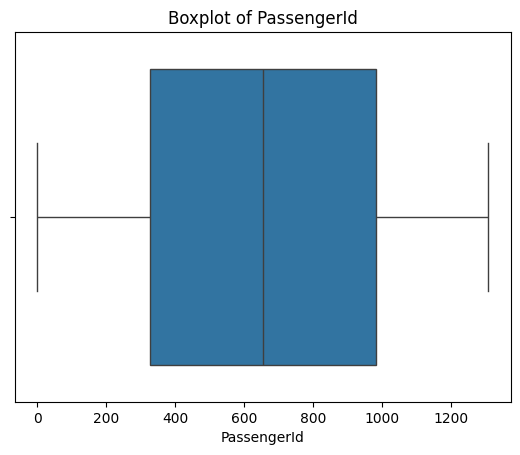

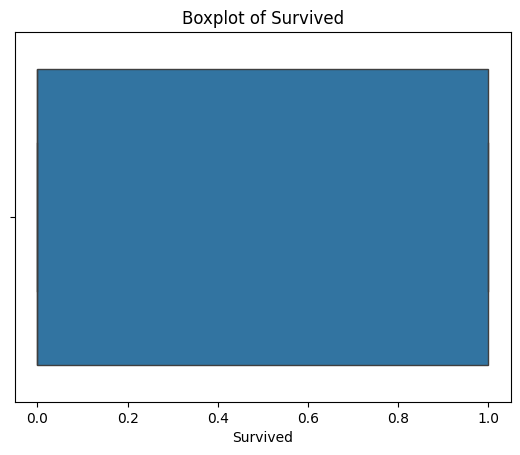

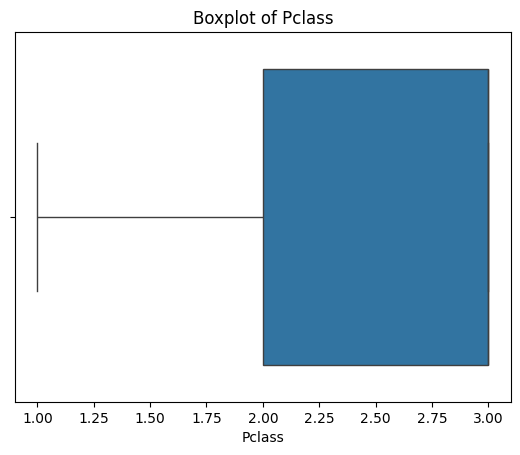

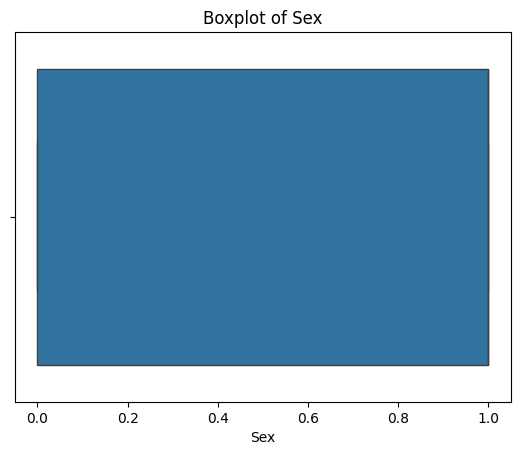

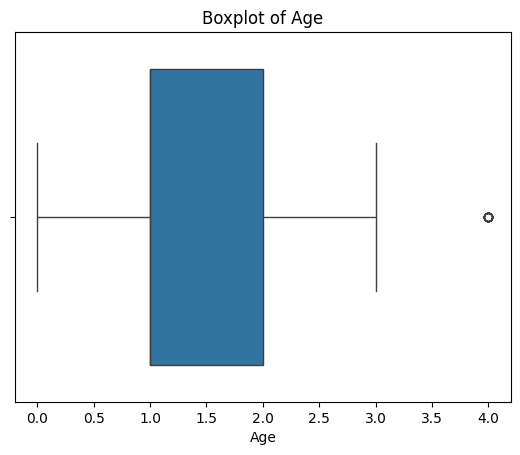

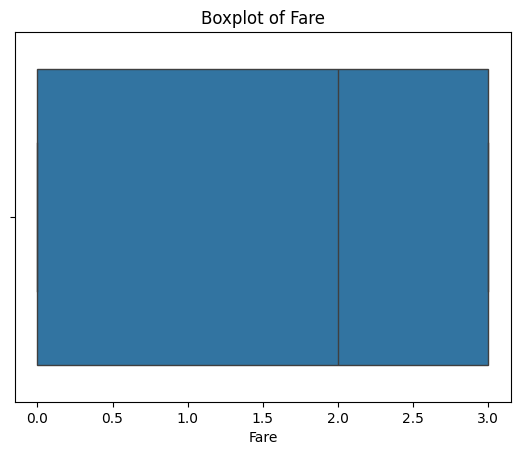

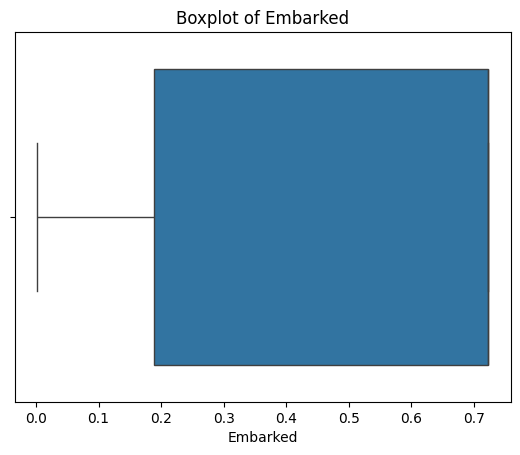

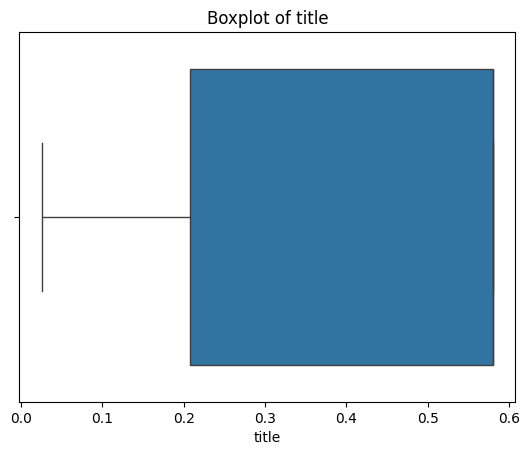

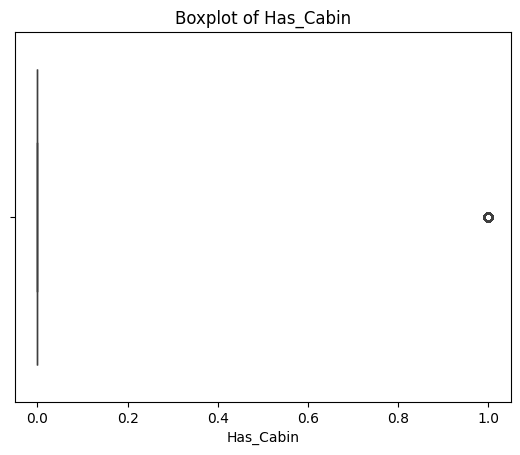

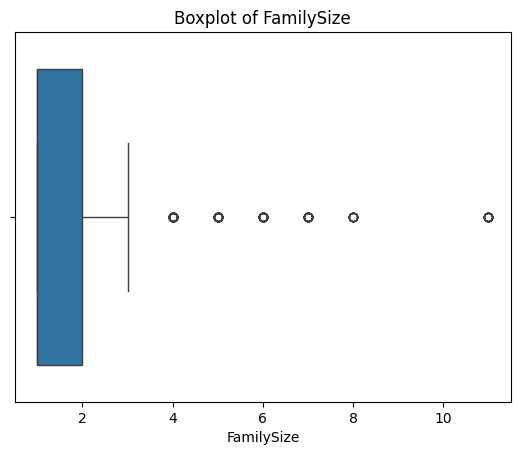

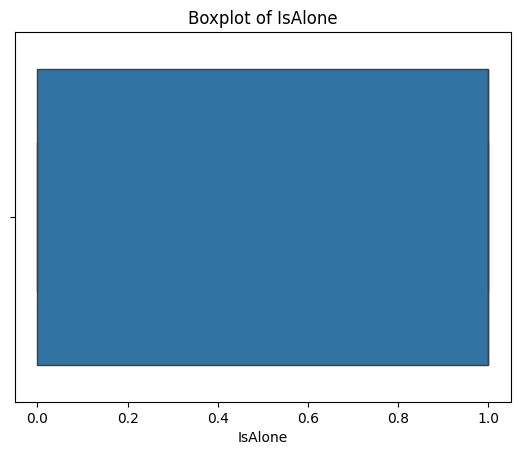

In [28]:
# Now its the best time to check the null values and ouliers in the data frame



# Check for null values
null_values = full_data.isnull().sum()
print("Number of null values in each column:")
print(null_values)

# Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

for col in full_data.select_dtypes(include=['int64', 'float64']):
    sns.boxplot(x=full_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Now lets separates the combined data back into **test and train sets**.

also ensures that the test set does not include the Survived column, as this is the **target variable** and is not present in the original test data.

furthermore, extract the target variable **Survived** from the train data.

then  prepare a list of feature columns, excluding **PassengerId**, for use in model training.

This is crucial for fitting a **machine learning model**, as it clearly defines the features and target variable for the training process.

In [29]:
test_df = full_data[full_data['PassengerId'].isin(PassengerId)]
test_df.drop(["Survived"], axis=1, inplace=True)
X = full_data[~full_data['PassengerId'].isin(PassengerId)]
y = X['Survived']
features = [col for col in X.columns if col != "PassengerId"]


<ipython-input-29-ca0561292d3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["Survived"], axis=1, inplace=True)


## **Corelation Matrix and check the interaction between the variables**

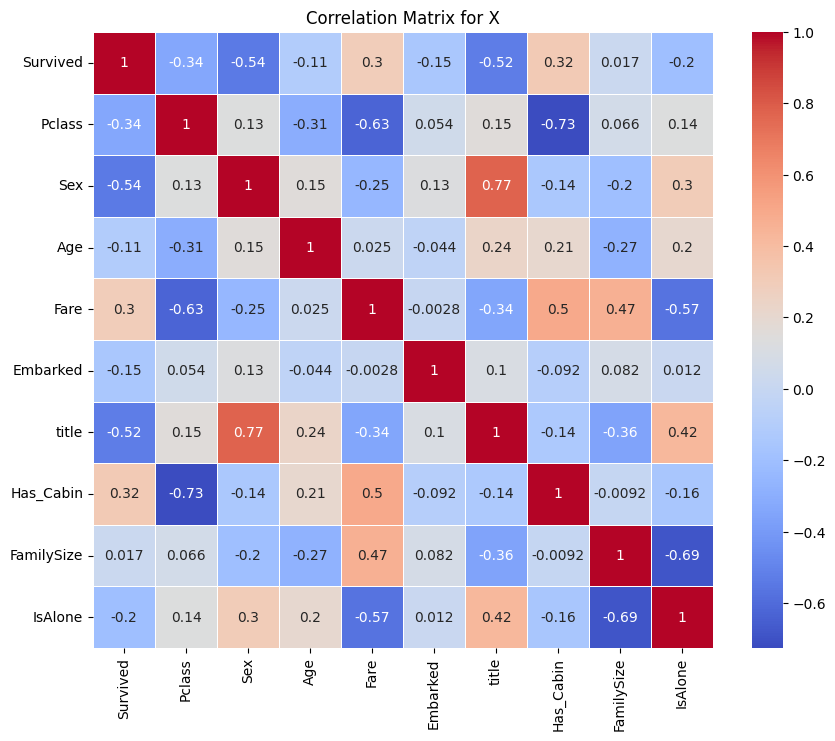

In [30]:
correlation_matrix = X[features].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for X')
plt.show()

**The correlation matrix suggests that there are some features that are highly correlated with each other.**

For example, 'FamilySize' and 'IsAlone' are highly negatively correlated,which means that as 'FamilySize' increases, 'IsAlone' decreases.

Similarly, 'Fare' and 'Pclass' are highly positively correlated, which means that as 'Fare' increases, 'Pclass' also increases.  

These correlations can be useful for feature selection and model building,as they can help us to identify features that are redundant or that may interact with each other in complex ways.

**Now checking the Skewness of all the of the columns** with the help of following -


**Visual Exploration:** Histograms will provide a visual representation of the distribution of each feature, helping to understand the data better.


**Skewness Calculation:** Printing the skewness helps us to identify whether the data is symmetrically distributed (skewness near 0), or if it is skewed to the left (negative skewness) or right (positive skewness). This information can guide further preprocessing steps such as normalization or transformation of features.


Skewness PassengerId: 0.0
Skewness Survived: 0.4777174662568536
Skewness Pclass: -0.6294858816096934
Skewness Sex: -0.6178784065548295
Skewness Age: 0.3020165267946633
Skewness Fare: -0.015066092049346938
Skewness Embarked: -1.0314181232847752
Skewness title: -0.4387181521929237
Skewness Has_Cabin: 1.29019002099093
Skewness FamilySize: 2.7228476726920388
Skewness IsAlone: -0.4197225626974862


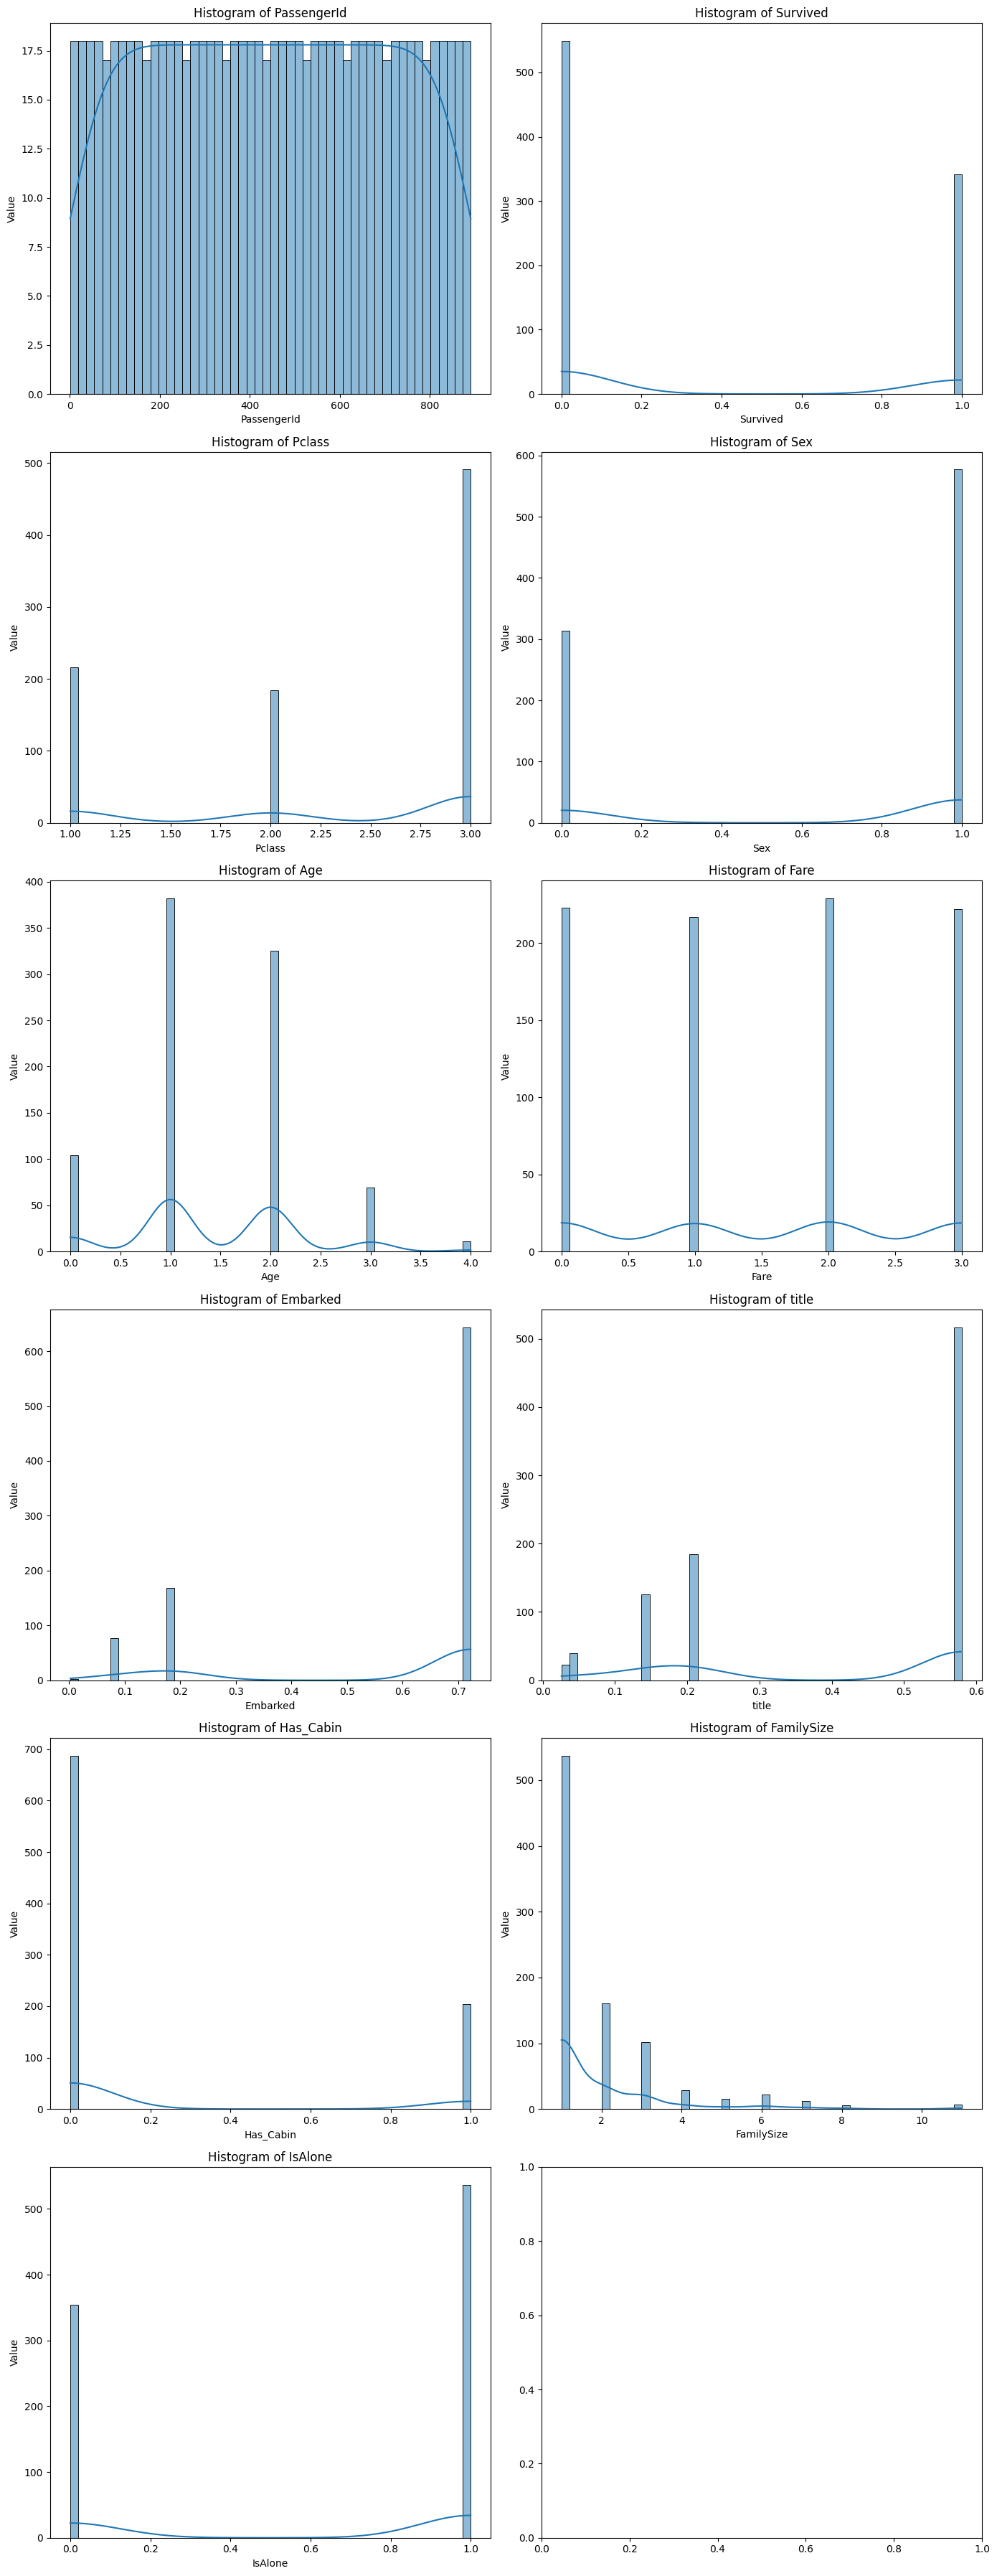

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Set up the figure and axes for subplots
num_cols = len(X.columns)
num_rows = (num_cols + 1) // 2  # Ensure enough rows for all columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 6 * num_rows))

# Iterate through all columns
for i, col in enumerate(X.columns):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]

    # Create a histogram for the current column
    sns.histplot(data=X, x=col, bins=50, kde=True, ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Value")
    ax.set_title(f"Histogram of {col}")

    # Calculate skewness for the current column
    skewness = skew(X[col])
    print(f"Skewness {col}:", skewness)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Has_Cabin and FamilySize** with high skewness may need transformation to reduce skewness, especially if skewness is affecting model performance.

**Pclass, Sex, Embarked, and Title** may also benefit from transformation or may need to be treated differently in the model.

**PassengerId and Fare** with near-zero skewness generally do not require transformation for skewness, but remember that **PassengerId** is usually not used as a feature in modeling.

In [32]:
X.drop(columns=["Survived"], inplace=True)

<ipython-input-32-4f682fa155c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=["Survived"], inplace=True)


##**Defining the LightGBM Parameters**


Verbosity: Controls the level of logging. -1 suppresses all messages except for errors.

Boosting type: Specifies the type of boosting algorithm. gbdt stands for Gradient Boosting Decision Tree.

Learningrate: Controls the contribution of each tree to the final model. A lower learning rate usually requires more trees.

Num leaves: The maximum number of leaves per tree. More leaves can improve accuracy but may cause overfitting.

Max depth: The maximum depth of each tree. -1 means no limit.
subsample: The fraction of samples to be used for fitting individual base learners. Helps prevent overfitting.

Colsample bytree: The fraction of features to be used for fitting individual base learners.

N estimators: The number of boosting iterations (trees).
seed: The random seed for reproducibility.

In [33]:
lgbm_params = {
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000,
    "seed": 42
}


##**Now defining XGBoost Parameters**

Verbosity: Controls the level of logging. 0 suppresses all messages except for errors.

Booster: Specifies the type of boosting algorithm. gbtree stands for Gradient Boosting Tree.

Eta: Equivalent to the learning rate in LightGBM.

Max depth: The maximum depth of each tree. None means no limit.

Subsample: The fraction of samples to be used for fitting individual base learners.

Colsample bytree: The fraction of features to be used for fitting individual base learners.

N estimators: The number of boosting iterations (trees).

seed: The random seed for reproducibility.


In [34]:
xgb_params = {
    "verbosity": 0,
    "booster": "gbtree",
    "eta": 0.05,
    "max_depth": None,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000,
    "seed": 42
}


In [35]:
features = [col for col in X.columns if col != "PassengerId"]


**LightGBM and XGBoost Parameters:** Both sets of parameters define how the gradient boosting models should be trained according to our liking, including settings for learning rate, tree depth, subsampling, and feature sampling.


**Feature List Preparation:** The list features includes all columns from X except for PassengerId, ensuring that the identifier is not used as a feature in the model training.


In [36]:
X[features]

,Pclass,Sex,Age,Fare,Embarked,title,Has_Cabin,FamilySize,IsAlone
0,3,1,1.0,0,0.722783,0.580247,0,2,0
1,1,0,2.0,3,0.188552,0.141414,1,2,0
2,3,0,1.0,1,0.722783,0.207632,0,1,1
3,1,0,2.0,3,0.722783,0.141414,1,2,0
4,3,1,2.0,1,0.722783,0.580247,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,1,1.0,1,0.722783,0.025814,0,1,1
887,1,0,1.0,2,0.722783,0.207632,1,1,1
888,3,0,1.0,2,0.722783,0.207632,0,4,0
889,1,1,1.0,2,0.188552,0.580247,1,1,1


**LightGBM model performing on the test data**

Accuracy: 0.84


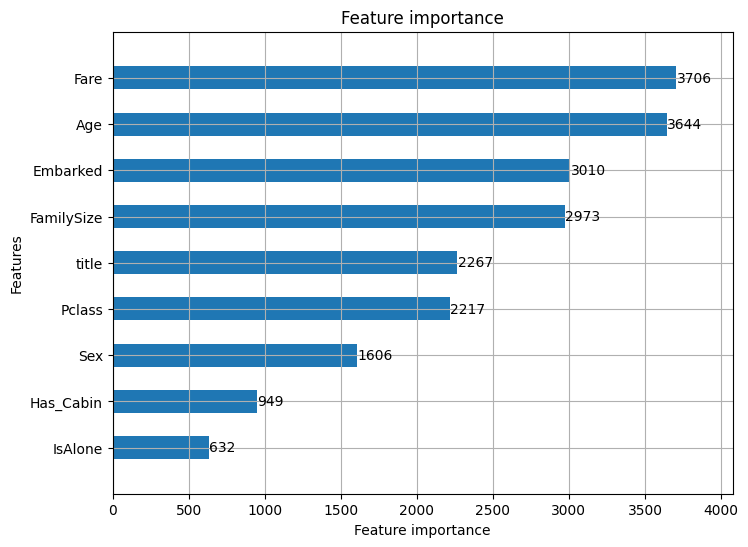

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.1, random_state=42)

# Create a LightGBM classifier
clf = lgb.LGBMClassifier(**lgbm_params)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


lgb.plot_importance(clf, height=0.5, figsize=(8, 6))
plt.show()


**XGBoost model performing on the test data**

Accuracy: 0.84


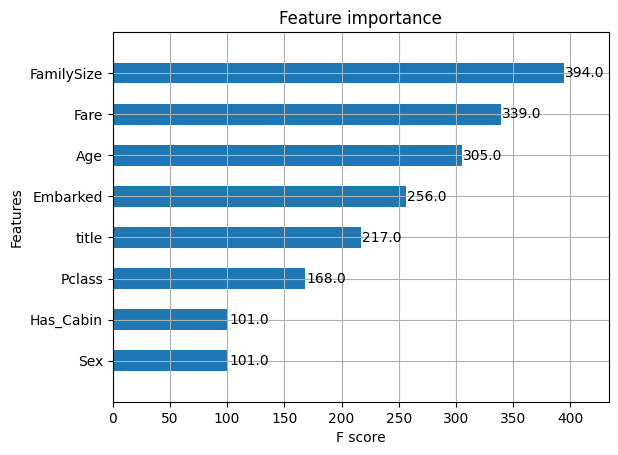

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.1, random_state=42)

# Create an XGBoost classifier
clf = xgb.XGBClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

xgb.plot_importance(clf, height=0.5)
plt.show()

**Based on the results**


The LightGBM model appears to be performing slightly better than the XGBoost model, achieving an accuracy of 0.85 compared to 0.83.

However, it's important to note that the difference in accuracy is relatively small, and the actual performance may vary depending on the specific dataset and parameters used.

Further analysis and model tuning might be necessary to determine the optimal model for this particular problem.